In [100]:
import numpy as np
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from datetime import datetime
from datetime import timedelta
import firebase_admin
from firebase_admin import db
from firebase_admin import credentials
import pytz
from scipy.fft import fft, fftfreq

In [101]:
### ONLY RUN ONCE! ###
#download data from firebase
try:
    firebase_admin.delete_app(app)
except:
    print('making new app')
cred = credentials.Certificate("../pc_basestation/fb_key.json")
app = firebase_admin.initialize_app(cred, {'databaseURL': 'https://haucs-monitoring-default-rtdb.firebaseio.com'})

In [102]:
ref = db.reference('/bmass_2/fdata')
data = ref.get()

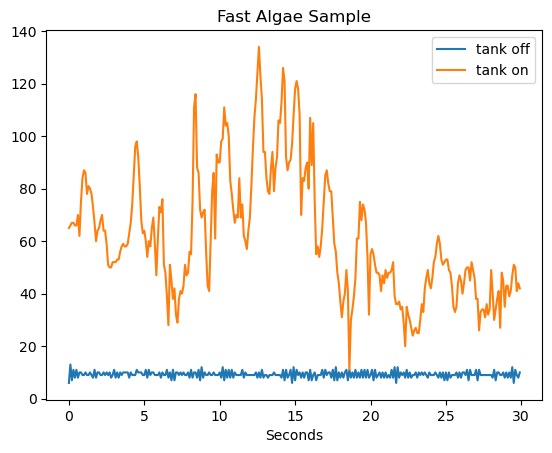

In [110]:
keys = list(data.keys())

x = np.arange(300)/10
y = np.array(data[keys[-2]]).astype('int')
y1 = np.array(data[keys[-1]]).astype('int')

plt.figure()
plt.title("Fast Algae Sample")
plt.xlabel("Seconds")
plt.plot(x,y)
plt.plot(x, y1)
plt.legend(['tank off', 'tank on'])
plt.show()

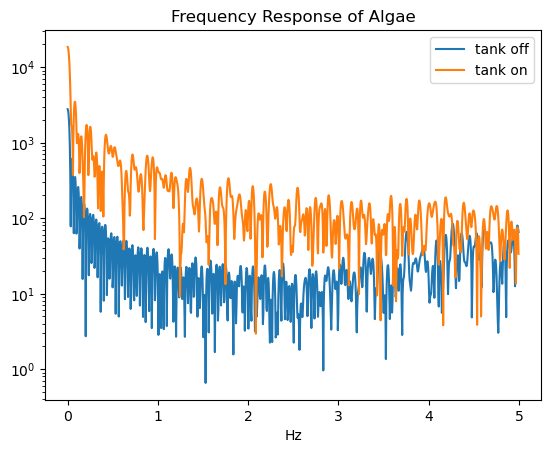

In [111]:
N = 2048
y_fft = fft(y, N)
y1_fft = fft(y1, N)
freq_range = fftfreq(N, 0.1)

plt.figure()
plt.title("Frequency Response of Algae")
plt.xlabel("Hz")
plt.plot(freq_range[:N//2], np.abs(y_fft)[:N//2])
plt.plot(freq_range[:N//2], np.abs(y1_fft)[:N//2])
plt.yscale('log')
# plt.xlim(0,1)
plt.legend(['tank off', 'tank on'])
plt.show()